<a href="https://colab.research.google.com/github/jdasam/mas1004-2023/blob/main/live_coding/2_function_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Approximation
## 1. Regression with One Variable
- Regression:
  - Process of training a model to predict a **continuous** numerical output based on one or more input features.
  - e.g.: Predicts the child's height based on the parent's height.
  - Why is it named "regression"?:
    - The term was first used by Sir Francis Galton, a British statistician and cousin of Charles Darwin, in the late 19th century. Galton was studying the relationship between heights of parents and their children. He observed that although tall parents often had tall children, the children's heights tended to "regress" towards the average or mean height of the population. Similarly, children of short parents were often short but their heights still regressed towards the average.

In [134]:
# Let's make function that works as f(x) = ax+b

a = 2
b = 0.5
def my_function(x):
  return a*x + b

my_function(1)

2.5

In [135]:
# Let's plot this function
# First, let's make many x candidates
# from -5 to 5, with 500 total x

xs = [i for i in range(500)]
xs = [(i-250)/50 for i in range(501)]
xs

[-5.0,
 -4.98,
 -4.96,
 -4.94,
 -4.92,
 -4.9,
 -4.88,
 -4.86,
 -4.84,
 -4.82,
 -4.8,
 -4.78,
 -4.76,
 -4.74,
 -4.72,
 -4.7,
 -4.68,
 -4.66,
 -4.64,
 -4.62,
 -4.6,
 -4.58,
 -4.56,
 -4.54,
 -4.52,
 -4.5,
 -4.48,
 -4.46,
 -4.44,
 -4.42,
 -4.4,
 -4.38,
 -4.36,
 -4.34,
 -4.32,
 -4.3,
 -4.28,
 -4.26,
 -4.24,
 -4.22,
 -4.2,
 -4.18,
 -4.16,
 -4.14,
 -4.12,
 -4.1,
 -4.08,
 -4.06,
 -4.04,
 -4.02,
 -4.0,
 -3.98,
 -3.96,
 -3.94,
 -3.92,
 -3.9,
 -3.88,
 -3.86,
 -3.84,
 -3.82,
 -3.8,
 -3.78,
 -3.76,
 -3.74,
 -3.72,
 -3.7,
 -3.68,
 -3.66,
 -3.64,
 -3.62,
 -3.6,
 -3.58,
 -3.56,
 -3.54,
 -3.52,
 -3.5,
 -3.48,
 -3.46,
 -3.44,
 -3.42,
 -3.4,
 -3.38,
 -3.36,
 -3.34,
 -3.32,
 -3.3,
 -3.28,
 -3.26,
 -3.24,
 -3.22,
 -3.2,
 -3.18,
 -3.16,
 -3.14,
 -3.12,
 -3.1,
 -3.08,
 -3.06,
 -3.04,
 -3.02,
 -3.0,
 -2.98,
 -2.96,
 -2.94,
 -2.92,
 -2.9,
 -2.88,
 -2.86,
 -2.84,
 -2.82,
 -2.8,
 -2.78,
 -2.76,
 -2.74,
 -2.72,
 -2.7,
 -2.68,
 -2.66,
 -2.64,
 -2.62,
 -2.6,
 -2.58,
 -2.56,
 -2.54,
 -2.52,
 -2.5,
 -2.48,
 -2.46,
 -

In [136]:
# y = f(x)
ys = [my_function(x) for x in xs]
ys

[-9.5,
 -9.46,
 -9.42,
 -9.38,
 -9.34,
 -9.3,
 -9.26,
 -9.22,
 -9.18,
 -9.14,
 -9.1,
 -9.06,
 -9.02,
 -8.98,
 -8.94,
 -8.9,
 -8.86,
 -8.82,
 -8.78,
 -8.74,
 -8.7,
 -8.66,
 -8.62,
 -8.58,
 -8.54,
 -8.5,
 -8.46,
 -8.42,
 -8.38,
 -8.34,
 -8.3,
 -8.26,
 -8.22,
 -8.18,
 -8.14,
 -8.1,
 -8.06,
 -8.02,
 -7.98,
 -7.9399999999999995,
 -7.9,
 -7.859999999999999,
 -7.82,
 -7.779999999999999,
 -7.74,
 -7.699999999999999,
 -7.66,
 -7.619999999999999,
 -7.58,
 -7.539999999999999,
 -7.5,
 -7.46,
 -7.42,
 -7.38,
 -7.34,
 -7.3,
 -7.26,
 -7.22,
 -7.18,
 -7.14,
 -7.1,
 -7.06,
 -7.02,
 -6.98,
 -6.94,
 -6.9,
 -6.86,
 -6.82,
 -6.78,
 -6.74,
 -6.7,
 -6.66,
 -6.62,
 -6.58,
 -6.54,
 -6.5,
 -6.46,
 -6.42,
 -6.38,
 -6.34,
 -6.3,
 -6.26,
 -6.22,
 -6.18,
 -6.14,
 -6.1,
 -6.06,
 -6.02,
 -5.98,
 -5.94,
 -5.9,
 -5.86,
 -5.82,
 -5.78,
 -5.74,
 -5.7,
 -5.66,
 -5.62,
 -5.58,
 -5.54,
 -5.5,
 -5.46,
 -5.42,
 -5.38,
 -5.34,
 -5.3,
 -5.26,
 -5.22,
 -5.18,
 -5.14,
 -5.1,
 -5.06,
 -5.02,
 -4.98,
 -4.94,
 -4.9,
 -4.86,
 -4.82,


In [137]:
len(xs), len(ys)

(501, 501)

In [138]:
idx = 23
xs[23], ys[23], my_function(xs[23])

(-4.54, -8.58, -8.58)

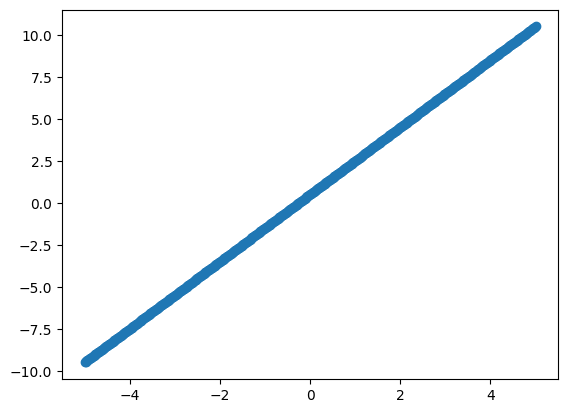

In [139]:
import matplotlib.pyplot as plt

plt.scatter(x=xs, y=ys)

In [140]:
# Let's add some noise
import random
random.random() # return a random float value between 0 and 1

ys_noise = [my_function(x) + (random.random()-0.5)*2  for x in xs]

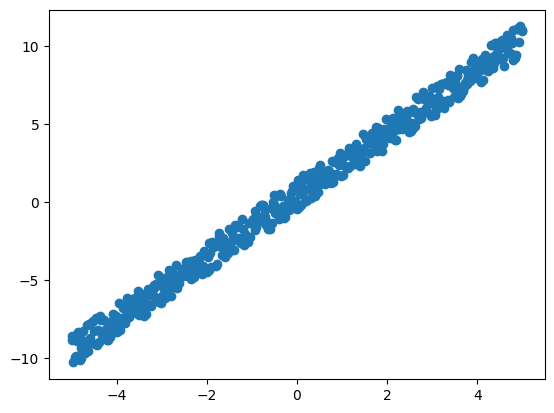

In [141]:
plt.scatter(xs, ys_noise)

In [142]:
# random is not actually complete random
# usually computers uses pseudo-random

# random.random() in fact has its destiny. It will always return same value
# if the seed is the same

random.seed(0)
[random.random() for _ in range(10)]


[0.8444218515250481,
 0.7579544029403025,
 0.420571580830845,
 0.25891675029296335,
 0.5112747213686085,
 0.4049341374504143,
 0.7837985890347726,
 0.30331272607892745,
 0.4765969541523558,
 0.5833820394550312]

In [143]:
[random.random() for _ in range(10)]


[0.9081128851953352,
 0.5046868558173903,
 0.28183784439970383,
 0.7558042041572239,
 0.6183689966753316,
 0.25050634136244054,
 0.9097462559682401,
 0.9827854760376531,
 0.8102172359965896,
 0.9021659504395827]

In [144]:
a = random.random()
b = random.random()

ys_noise = [my_function(x) + (random.random()-0.5)  for x in xs]


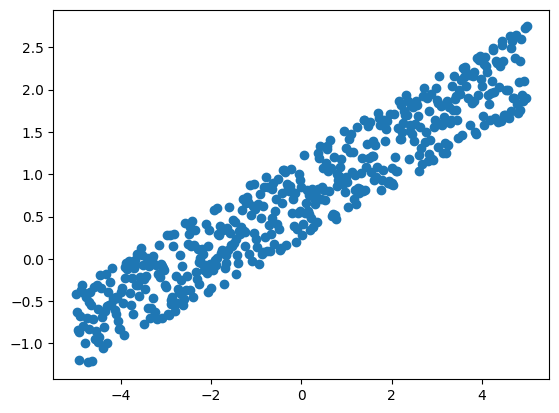

In [145]:
plt.scatter(xs, ys_noise)

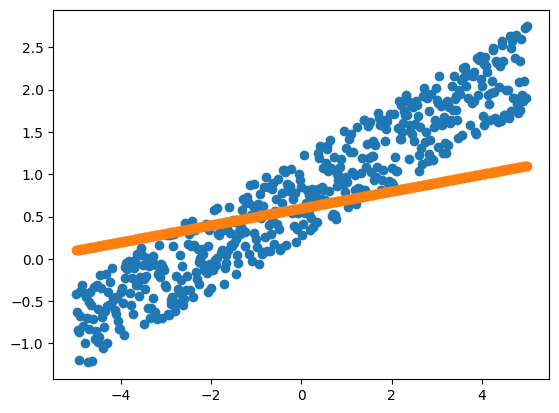

In [146]:
a_est = 0.1
b_est = 0.6
def my_estimation(x):
  return a_est * x + b_est

estimations = [my_estimation(x) for x in xs]

plt.scatter(xs, ys_noise)
plt.scatter(xs, estimations)

In [147]:

# How can we calculates how good our estimation is?
def cal_error(pred, target):
  # target is the correct answer, desired output
  # prediction is the output of your current model
  return abs(pred-target)

cal_error(1, 1.1), cal_error(1.2, 1.1)

(0.10000000000000009, 0.09999999999999987)

In [148]:
# compare every value in y_noise and estimation
# we have to compare values in the same idx

errors = []
for i in range(len(ys_noise)):
  target = ys_noise[i]
  pred = estimations[i]
  error = cal_error(pred, target)
  errors.append(error)

errors = [cal_error(pred, target) for target, pred in zip(ys_noise, estimations)]

sum(errors) / len(errors) # mean value of errors

0.5708082480613961

In [149]:
a_est = 0.91
b_est = 0.5

estimations = [my_estimation(x) for x in xs]
errors = [cal_error(pred, target) for target, pred in zip(ys_noise, estimations)]
sum(errors) / len(errors)

1.5260886365629844

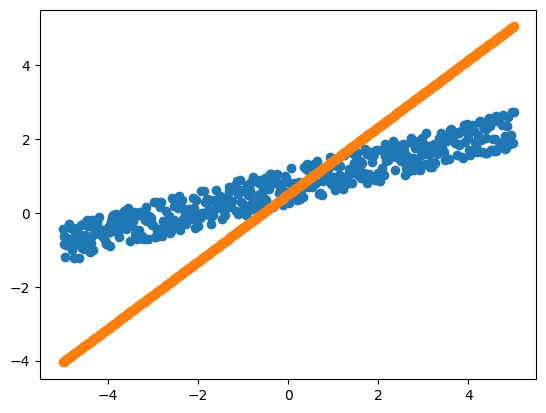

In [150]:
plt.scatter(xs, ys_noise)
plt.scatter(xs, estimations)

- CamelCase
  - uses upper letter to distinguish words
  - MyModelFunction
  - myModelFunction
- snake_case
  - uses underbar
  - my_model_function

In [151]:
from math import sin, cos

class ComplexFunction: # You ALWAYS HAVE TO name the class in CamelCase
# class complex_function:
# class name has to start with Upper letter
  def __init__(self):
    self.param_a = random.random()
    self.param_b = random.random()
    self.param_c = random.random() + 5
    # these self.param_x is called attribute

  def print_itself(self):
    # every method of class has to take 'self' as its argument.
    print(self.param_a, self.param_b, self.param_c)

  def print_param_a(x, self):
    # 0th argument is always the class instance itself
    # no matter how you name it
    print(x.param_a)

  def __call__(self, x):
    # this is a method of the class
    # and this is example of special method
    # this function is called when you call instance, such as comp_function(some_input)
    return x * self.param_a +  x**2 * self.param_b +  sin(x) *self.param_c + (random.random()-0.5) * 2

random.seed(0)
comp_func = ComplexFunction()
comp_func_b = ComplexFunction()
# now comp_func is an instance of the class ComplexFunction
# you have to call () the class name to declare its instance
# this calls the Class's __init__ method

# comp_func.param_a, comp_func.param_b, comp_func.param_c, comp_func_b.param_c
# we can run the method of instance by calling it
# comp_func.print_itself('input')
# comp_func.print_param_a("this is my parameter")

random.seed(0)
comp_func(0.5) # this calls ComplexFunction.__call__()


3.8993036792301603

In [152]:
# You can do the same thing wihtout class
# But it will look bit dirty

# first define parameters
param = [random.random(), random.random(), random.random()]
random.seed(0)
param = [random.random() for whatever in range(3)]
param

# define function
def my_complex_func(x, parameters):
  return x * parameters[0] + x**parameters[2] + x**2 * parameters[1] + (random.random()-0.5) * 2

random.seed(0)
my_complex_func(0.5, param)

2.0476717906237787

In [153]:
# comp_func.print_itself(),
print(param)
comp_func.print_itself()

[0.8444218515250481, 0.7579544029403025, 0.420571580830845]
0.8444218515250481 0.7579544029403025 5.4205715808308454


In [154]:
# ComplexFunction.print_itself() # the class itself cannot work as self,
# because it is not an instance


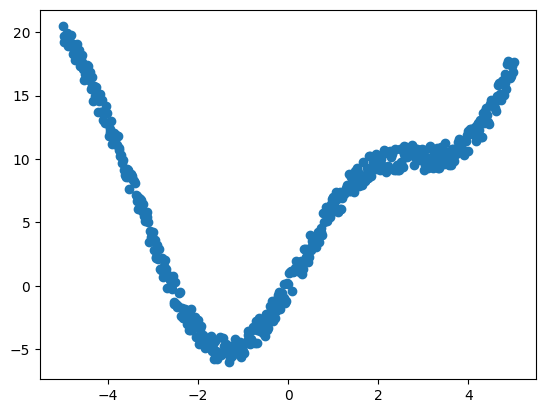

In [155]:
ys_comp = [comp_func(x) for x in xs]
plt.scatter(xs, ys_comp)

In [156]:
import torch

# first let's define a neuron
# we have one input dimension

class Neuron:
  def __init__(self, input_dim=1, use_bias=True):
    self.weights = [random.random() for _ in range(input_dim)]
    if use_bias:
      self.bias = 0 # it is normal to initialize bias as zero

  # def __call__(self, input_scalar):
  #   return self.weights[0] * input_scalar + self.bias

  def __call__(self, input_vector):
    # first let's check whether the input_vector's dimension is correct
    # A specific neuron always expects input vector as a specific dimension

    # Make assertion that input_vector's dimension is same with self.weights' dimension
    assert len(input_vector) == len(self.weights), 'Input dimension is different'
    # if assertion is not True, it will make error and print the string behind

    # Let's make vector multiplication as for loop
    output = []
    for i in range(len(input_vector)):
      input_value = input_vector[i]
      weight = self.weights[i]
      mul = input_value * weight
      output.append(mul)

    # you can do it with list comprehension
    output = [ input_vector[i] * self.weights[i] for i in range(len(input_vector))]

    # you can do it with zip also
    output = [ input_value * weight   for input_value, weight in zip(input_vector, self.weights)]

    return sum(output) + self.bias

random.seed(0)
neuron = Neuron(3)
print(neuron.weights, neuron.bias)

# neuron(0.5)
neuron([0.5, -1, 2])

[0.8444218515250481, 0.7579544029403025, 0.420571580830845] 0


0.5053996844839116

In [157]:
input_sample = [0.5, -0.3, 1.3]
another_input_sample = [-1.2, -0.5, -0.1]

# Define neurons
for input in [input_sample, another_input_sample]:
  neuron_a = Neuron(3) # Neuron is a class, neuron_a is an instance of the class Neuron
  # neuron_a = Neuron(input_dim=3) # same with the line above
  neuron_a.weights = [0.8, 1.2, 0.7]
  neuron_b = Neuron(3)
  neuron_b.weights = [-0.2, 0.5, 1.9]
  neuron_c = Neuron(input_dim=2)
  neuron_c.weights = [-1.5, 1.6]

  # Feed input data to the neurons
  output_a = neuron_a(input) # 0.95
  output_b = neuron_b(input) # 2.22

  middle_output = [output_a, output_b] # [0.95, 2.22]

  output = neuron_c(middle_output)
  print(output)


2.127
2.125


In [158]:
import numpy as np
import torch

# make it as a matrix

# make neurons as a matrix
print(neuron_a.weights, neuron_b.weights)

weight_array = np.asarray([neuron_a.weights, neuron_b.weights])
# below will make error
# np.asarray([neuron_a.weights, neuron_b.weights, neuron_c.weights])
print(weight_array)

# in torch, we use tensor, which corresponds to np.array
weight_tensor = torch.tensor([neuron_a.weights, neuron_b.weights])
print(weight_tensor)

# below will make error
# torch.tensor([neuron_a.weights, neuron_b.weights, neuron_c.weights])

[0.8, 1.2, 0.7] [-0.2, 0.5, 1.9]
[[ 0.8  1.2  0.7]
 [-0.2  0.5  1.9]]
tensor([[ 0.8000,  1.2000,  0.7000],
        [-0.2000,  0.5000,  1.9000]])


In [159]:
# indexing and slicing in tensor (it's same with using array)
idx_for_0th_dim = 1
idx_for_1st_dim = 2

weight_tensor[idx_for_0th_dim, idx_for_1st_dim]

tensor(1.9000)

In [160]:
weight_tensor[:, :2] # select every item in 0th axis, select items until index 2 in 1st axis

tensor([[ 0.8000,  1.2000],
        [-0.2000,  0.5000]])

In [161]:
# get matrix multiplication
# using torch.mm (matrix multiplication)
# torch.mm(matrix_a, matrix_b) # This will calculates matrix_a X matrix_b

print(type(input_sample))
# torch.mm(input_sample, weight_tensor) # this makes error
input_tensor = torch.tensor(input_sample)
print(input_tensor, input_tensor.shape, weight_tensor.shape)
# torch.mm(input_tensor, weight_tensor)
input_tensor = input_tensor.reshape([1, 3])
print(input_tensor, input_tensor.shape, weight_tensor.shape)
torch.mm(input_tensor, weight_tensor.T) # transpose weight_tensor

<class 'list'>
tensor([ 0.5000, -0.3000,  1.3000]) torch.Size([3]) torch.Size([2, 3])
tensor([[ 0.5000, -0.3000,  1.3000]]) torch.Size([1, 3]) torch.Size([2, 3])


tensor([[0.9500, 2.2200]])

In [162]:
# transpose vs reshape
print(weight_tensor)
print(weight_tensor.T)
print(weight_tensor.reshape([3,2]) ) # it just re arranges cutting position

tensor([[ 0.8000,  1.2000,  0.7000],
        [-0.2000,  0.5000,  1.9000]])
tensor([[ 0.8000, -0.2000],
        [ 1.2000,  0.5000],
        [ 0.7000,  1.9000]])
tensor([[ 0.8000,  1.2000],
        [ 0.7000, -0.2000],
        [ 0.5000,  1.9000]])


In [163]:
# let's make several input_samples as a matrix
input_tensor = torch.tensor([input_sample, another_input_sample])
print(input_tensor, input_tensor.shape)
middle_output = torch.mm(input_tensor, weight_tensor.T)
middle_output

tensor([[ 0.5000, -0.3000,  1.3000],
        [-1.2000, -0.5000, -0.1000]]) torch.Size([2, 3])


tensor([[ 0.9500,  2.2200],
        [-1.6300, -0.2000]])

In [164]:
weight_c_tensor = torch.tensor([neuron_c.weights])
# torch.tensor(neuron_c.weights) is different with torch.tensor([neuron_c.weights])
print(weight_c_tensor.shape)

final_output = torch.mm(middle_output, weight_c_tensor.T)
final_output

torch.Size([1, 2])


tensor([[2.1270],
        [2.1250]])

In [165]:
# In actual scenario, we define a layer, not a neuron
# a layer is a set of neurons that shares the same input
# such as neuron_a and neuron_b in the previous example

class NeuralLayer:
  def __init__(self, input_dim, output_dim):
    # output_dim means number of neurons in the layer
    self.weights = torch.randn(input_dim, output_dim)

  def __call__(self, input):
    return torch.mm(input, self.weights)

# torch.randn([3,2]) # random numbers from normal distribution (Gaussian distribution)

layer = NeuralLayer(input_dim=3, output_dim=2)
layer.weights = weight_tensor.T
layer(input_tensor)

tensor([[ 0.9500,  2.2200],
        [-1.6300, -0.2000]])

In [166]:
torch_layer = torch.nn.Linear(3,2, bias=False)
print(torch_layer.weight.shape)
torch_layer.weight.data = weight_tensor # copy the weight to the layer
torch_layer(input_tensor)

torch.Size([2, 3])


tensor([[ 0.9500,  2.2200],
        [-1.6300, -0.2000]], grad_fn=<MmBackward0>)

In [167]:
from IPython import display
import matplotlib.pyplot as plt

# Training loop
torch.manual_seed(0)
layer1 = torch.nn.Linear(in_features=1, out_features=4)
layer2 = torch.nn.Linear(in_features=4, out_features=1)

optimizer = torch.optim.Adam([layer1.weight, layer2.weight, layer1.bias, layer2.bias], lr=0.1)
xs_tensor = torch.tensor(xs).unsqueeze(-1)
ys_tensor = torch.tensor(ys_comp).unsqueeze(-1)



In [168]:
layer1.weight, layer1.bias

# layer1 has four neuron
# each neuron is doing ax + b
# or, weights * x + bias
# neuron_0 = -0.0075 * x + (-0.3852)
# neuron_1 = 0.5364 * x + 0.2682
# ...

(Parameter containing:
 tensor([[-0.0075],
         [ 0.5364],
         [-0.8230],
         [-0.7359]], requires_grad=True),
 Parameter containing:
 tensor([-0.3852,  0.2682, -0.0198,  0.7929], requires_grad=True))

In [169]:
layer2.weight, layer2.bias

# -0.0444 * neuron_0_output + 0.1323 & neuron_1_output + ... + (-0.4777)

(Parameter containing:
 tensor([[-0.0444,  0.1323, -0.1511, -0.0983]], requires_grad=True),
 Parameter containing:
 tensor([-0.4777], requires_grad=True))

In [170]:
layer12 = torch.nn.Linear(1,1)
layer12.weight, layer12.bias

# Can we make a single layer, that do the same thing with layer1 + layer2?
x_coefficient = (layer1.weight.data.squeeze() * layer2.weight.data.squeeze()).sum()
total_bias = (layer1.bias.data * layer2.weight.data.squeeze()).sum() + layer2.bias

layer12.weight.data = x_coefficient.view([1,1])
layer12.bias.data = total_bias
# layer12.bias.shape, total_bias.shape

In [171]:
input_value = torch.tensor([-0.3])
layer1_out = layer1(input_value)
layer2_out = layer2(layer1_out)

layer12_out = layer12(input_value)

layer2_out, layer12_out

# Without non-linearity, even though you stack several layers,
# Those layers can be perfectly replaced by a single layer

(tensor([-0.5804], grad_fn=<AddBackward0>),
 tensor([-0.5804], grad_fn=<AddBackward0>))

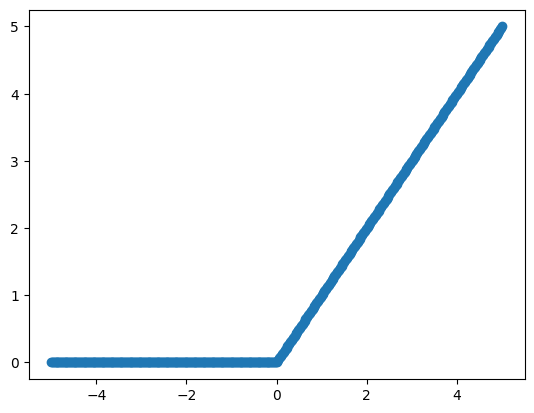

In [172]:
# Let's give Non-linearity
def relu(x):
  if x > 0:
    return x
  else:
    return 0

relu(0.5), relu(-1)

relu_out = [relu(x) for x in xs] # xs = [-5, -4.98, ...., 4.98, 5.00]
plt.scatter(xs, relu_out)

In [177]:
class ComplexFunction: # You ALWAYS HAVE TO name the class in CamelCase
# class complex_function:
# class name has to start with Upper letter
  def __init__(self):
    self.param_a = random.random() * 3
    self.param_b = random.random() * 2
    self.param_c = random.random() + 5
    # these self.param_x is called attribute

  def print_itself(self):
    # every method of class has to take 'self' as its argument.
    print(self.param_a, self.param_b, self.param_c)

  def print_param_a(x, self):
    # 0th argument is always the class instance itself
    # no matter how you name it
    print(x.param_a)

  def __call__(self, x):
    # this is a method of the class
    # and this is example of special method
    # this function is called when you call instance, such as comp_function(some_input)
    return x * self.param_a +  cos(x) * self.param_b +  sin(x) *self.param_c + (random.random()-0.5) * 2

random.seed(0)
comp_func = ComplexFunction()

ys_comp = [comp_func(x) for x in xs]
ys_tensor = torch.tensor(ys_comp).unsqueeze(-1)


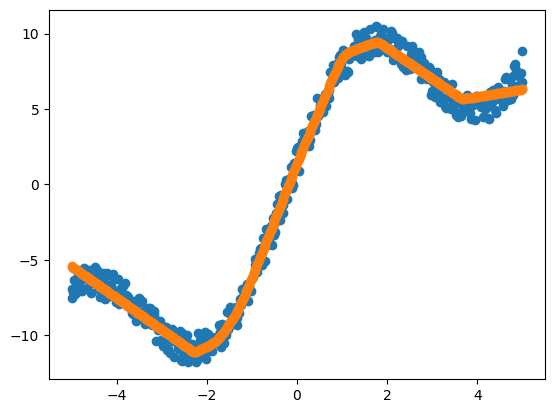

In [180]:
# For loop for training the neural network
# For each iteration, the neural networks'parameter (weights and biases) are updated
layer1 = torch.nn.Linear(in_features=1, out_features=128)
layer2 = torch.nn.Linear(in_features=128, out_features=1)

optimizer = torch.optim.Adam([layer1.weight, layer2.weight, layer1.bias, layer2.bias], lr=0.1)

for i in range(100):
  # pred = layer2(torch.relu(layer1(xs_tensor)))
  layer1_out = layer1(xs_tensor)
  layer1_out = torch.relu(layer1_out)
  pred = layer2(layer1_out) # feeding result without non-linear activation function
  loss = ((pred - ys_tensor) ** 2).mean()

  # These lines are where magic happens
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  # -----

  # print(loss.item())
  plt.scatter(xs, ys_comp)
  plt.scatter(xs, pred.squeeze().detach())
  display.clear_output(wait=True)
  display.display(plt.gcf())
  plt.close()

-0.8910753130912781 -0.9556609988212585
-1.0339064598083496 -0.6342045068740845
0.8154685497283936 1.3881564140319824
-0.5571649074554443 -1.4513328075408936
-2.1532022953033447 2.392153739929199
0.4843023121356964 1.0663036108016968
0.45859870314598083 1.262098789215088
0.6954667568206787 -0.9106172919273376
-0.2839178442955017 -1.7239000797271729
-0.6330476999282837 -0.49812430143356323
0.10581409931182861 -0.7753055095672607
0.953682005405426 1.1799333095550537
-1.2443112134933472 -2.8514442443847656
-0.6389662027359009 -1.6428636312484741
-0.2360525131225586 -0.561813235282898
-0.06524413824081421 -1.7512413263320923


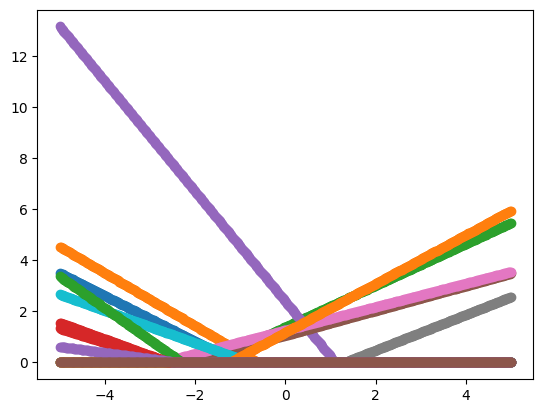

In [174]:
def neuron_function(layer, neuron_idx):
  weight = layer.weight[neuron_idx]# idx-th weight of the layer
  bias = layer.bias[neuron_idx]

  # return lambda x: weight*x + b
  return weight.item(), bias.item() # This convert tensor into a normal float value

for i in range(16):
  weight, bias = neuron_function(layer1, i)
  print(weight, bias) # now they are just float numbers
  neuron_out = [weight * x + bias for x in xs] # xs = [-5, -4.98, ...., 4.98, 5.00]
  # plt.scatter(xs, neuron_out)
  relu_out = [relu(x) for x in neuron_out]
  plt.scatter(xs, relu_out)

### Update plot in for loop
```
from IPython import display
import matplotlib.pyplot as plt

for i in range(10):
  plt.plot([i], [i], 'o')
  display.clear_output(wait=True)
  display.display(plt.gcf())
  plt.close()
```

## 2. Regression with Multiple Variables
  - e.g.: Predict wine quality based on features like acidity, sugar content, and alcohol level.